In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Built and built well by Jonah Robinson, Owen Goazli, Kush Goswami, Doran Chang
University of California Berkeley, 2023


In [ ]:
!pip install qpsolvers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
from qpsolvers import solve_qp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sp500_tickers_2014 = ['A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE', 'ACN', 'ADBE', 'ADI',
 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN',
 'AIG', 'AIV', 'AIZ', 'AKAM', 'ALL', 'ALLE', 'ALTR', 'ALXN', 'AMAT', 'AME',
 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC',
 'APD', 'APH', 'ARG', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AXP', 'AZO', 'BA',
 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BF-B', 'BHI',
 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRCM', 'BRK-B', 'BSX', 'BWA', 'BXP',
 'C', 'CA', 'CAG', 'CAH', 'CAM', 'CAT', 'CB', 'CBG', 'CBS', 'CCE', 'CCI',
 'CCL', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CI', 'CINF',
 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNP', 'CNX',
 'COF', 'COG', 'COH', 'COL', 'COO', 'COP', 'COST', 'COV', 'CPB', 'CRM',
 'CSC', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVC', 'CVS', 'CVX',
 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
 'DISCA', 'DISCK', 'DLPH', 'DLTR', 'DNB', 'DO', 'DOV', 'DOW', 'DPS', 'DRI',
 'DTE', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL',
 'EMC', 'EMN', 'EMR', 'EOG', 'EQR', 'EQT', 'ES', 'ESRX', 'ESS', 'ETFC',
 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FCX',
 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR', 'FLR', 'FLS', 'FMC',
 'FOX', 'FOXA', 'FSLR', 'FTI', 'FTR', 'GAS', 'GCI', 'GD', 'GE', 'GGP', 
 'GIS', 'GLW', 'GM', 'GME', 'GNW', 'GOOG', 'GPC', 'GPS', 'GRMN', 'GS',
 'GT', 'GWW', 'HAL', 'HAR', 'HAS', 'HBAN', 'HCBK', 'HCN', 'HCP', 'HD',
 'HES', 'HIG', 'HOG', 'HON', 'HOT', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL',
 'HRS', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IFF', 'IGT', 'INTC',
 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'ITW', 'IVZ', 'JCI', 'JEC',
 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KIM', 'KLAC', 'KMB', 'KMI',
 'KMX', 'KO', 'KORS', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH',
 'LLL', 'LLTC', 'LLY', 'LM', 'LMT', 'LNC', 'LO', 'LOW', 'LRCX', 'LUK',
 'LUV', 'LVLT', 'LYB', 'M', 'MA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD',
 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MHFI', 'MHK', 'MJN', 'MKC',
 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MON', 'MOS', 'MPC', 'MRK', 'MRO',
 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MUR', 'MYL', 'NAVI', 'NBL',
 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN', 'NOC', 'NOV',
 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O',
 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PBI', 'PCAR',
 'PCG', 'PCL', 'PCLN', 'PCP', 'PDCO', 'PEG', 'PEP', 'PETM', 'PFE', 'PFG',
 'PG', 'PGR', 'PH', 'PHM', 'PKI', 'PLD', 'PLL', 'PM', 'PNC', 'PNR',
 'PNW', 'POM', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR',
 'PX', 'PXD', 'QCOM', 'QLGC', 'QRVO', 'RAI', 'RCL', 'REGN', 'RF', 'RHI',
 'RHT', 'RIG', 'RL', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBUX', 
 'SCG', 'SCHW', 'SE', 'SEE', 'SHW', 'SIAL', 'SJM', 'SLB', 'SLM', 'SNA',
  'SNDK', 'SNI', 'SO', 'SPG', 'SPLS', 'SRCL', 'SRE', 'STI', 'STJ', 'STT',
   'STX', 'STZ', 'SWK', 'SWN', 'SWY', 'SYK', 'SYMC', 'SYY', 'T', 'TAP', 'TDC',
   'TE', 'TEG', 'TEL', 'TGT', 'THC', 'TIF', 'TJX', 'TMK', 'TMO', 'TRIP', 'TROW',
   'TRV', 'TSCO', 'TSN', 'TSO', 'TSS', 'TWC', 'TWX', 'TXN', 'TXT', 'TYC', 'UA', 'UHS',
   'UNH', 'UNM', 'UNP', 'UPS', 'URBN', 'URI', 'USB', 'UTX', 'V', 'VAR', 'VFC', 'VIAB',
   'VLO', 'VMC', 'VNO', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAG', 'WAT', 'WDC', 'WEC', 'WFC', 
   'WFM', 'WHR', 'WIN', 'WLP', 'WM', 'WMB', 'WMT', 'WU', 'WY', 'WYN', 'WYNN', 'XEC', 'XEL',
   'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM', 'ZION', 'ZMH']


# Use yfinance to retrieve data for all S&P 500 stocks
training_data = yf.download(sp500_tickers_2014, start="2014-12-31", end="2017-12-31").dropna(axis=1)

[*********************100%***********************]  495 of 495 completed

96 Failed downloads:
- SIAL: No data found for this date range, symbol may be delisted
- TIF: No timezone found, symbol may be delisted
- PETM: Data doesn't exist for startDate = 1420002000, endDate = 1514696400
- VAR: No timezone found, symbol may be delisted
- MON: No timezone found, symbol may be delisted
- SNDK: No data found for this date range, symbol may be delisted
- MJN: No data found for this date range, symbol may be delisted
- TE: No data found for this date range, symbol may be delisted
- AGN: No timezone found, symbol may be delisted
- SPLS: No data found for this date range, symbol may be delisted
- BRCM: No data found for this date range, symbol may be delisted
- WYN: No data found for this date range, symbol may be delisted
- ALXN: No timezone found, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
- STI: No timezone found, symbol may be delisted
- RAI: No 

In [ ]:
closes = training_data['Adj Close']

In [ ]:
cov_matrix = closes.cov()

In [ ]:
cov_matrix

,A,AA,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,WU,WY,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZION
A,91.768873,60.330454,45.426005,76.510608,-32.661706,33.045523,133.826131,277.057279,100.268979,5.076464,...,4.422432,18.303843,189.407724,46.049471,13.011240,25.287935,10.646988,90.374625,73.970996,61.493516
AA,60.330454,63.321326,35.759317,54.697201,-7.638783,27.784349,70.833910,166.647272,70.888217,11.606122,...,2.605913,15.332211,181.234777,24.925805,9.307430,4.788450,14.941189,55.064772,48.283244,44.683175
AAPL,45.426005,35.759317,29.187723,40.046495,-0.792992,21.646999,58.764962,137.869860,54.723027,5.573457,...,1.952629,9.920492,109.412159,19.416315,1.822182,7.691717,7.989611,40.322569,38.356381,34.034133
ABBV,76.510608,54.697201,40.046495,81.070078,-18.504243,36.340870,113.819706,233.196924,82.480508,5.609609,...,3.515450,15.592932,173.788737,35.468820,9.079716,17.963747,9.526361,75.556043,65.611155,50.877315
ABC,-32.661706,-7.638783,-0.792992,-18.504243,87.202917,8.781788,-83.278941,-123.030893,-29.197278,8.019118,...,-2.016410,-4.187643,-16.273621,-30.706013,-17.669812,-23.292363,4.950228,-52.534707,-19.781000,-18.371411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,25.287935,4.788450,7.691717,17.963747,-23.292363,3.721832,53.963667,90.420239,26.858804,-4.815841,...,1.521289,4.557631,17.492565,17.597693,6.662564,20.232599,-2.139148,29.365633,18.003198,15.717207
XRX,10.646988,14.941189,7.989611,9.526361,4.950228,7.172440,5.262126,23.545616,11.388357,3.288851,...,0.030951,3.515231,49.329387,3.075029,0.494772,-2.139148,5.665190,6.749806,7.491709,6.804199
XYL,90.374625,55.064772,40.322569,75.556043,-52.534707,27.290063,147.386412,281.890926,99.410954,3.282660,...,5.594109,17.461163,167.312235,49.114724,18.181626,29.365633,6.749806,99.546790,74.761115,62.209613
YUM,73.970996,48.283244,38.356381,65.611155,-19.781000,28.911528,110.280248,223.090710,84.713700,8.487592,...,4.907036,14.673768,154.220845,35.965454,10.594063,18.003198,7.491709,74.761115,69.390130,53.201285


In [ ]:
training_returns = closes.iloc[[0, len(closes) - 1], :].transpose()
training_returns

Date,2014-12-31 00:00:00,2017-12-29 00:00:00
A,38.084961,64.383575
AA,36.612675,53.261456
AAPL,24.801624,40.168858
ABBV,45.798298,75.257759
ABC,79.457375,84.745949
...,...,...
XRAY,49.859371,62.615978
XRX,26.346069,23.029209
XYL,34.242165,64.033493
YUM,44.820732,74.344383


In [ ]:
training_returns['returns'] = (training_returns.iloc[:, 1] - training_returns.iloc[:, 0]) / training_returns.iloc[:, 0]

In [ ]:
training_returns['returns']

A       0.690525
AA      0.454727
AAPL    0.619606
ABBV    0.643244
ABC     0.066559
          ...   
XRAY    0.255852
XRX    -0.125896
XYL     0.870019
YUM     0.658705
ZION    0.832962
Name: returns, Length: 384, dtype: float64

In [ ]:
training_returns

Date,2014-12-31 00:00:00,2017-12-29 00:00:00,returns
A,38.084961,64.383575,0.690525
AA,36.612675,53.261456,0.454727
AAPL,24.801624,40.168858,0.619606
ABBV,45.798298,75.257759,0.643244
ABC,79.457375,84.745949,0.066559
...,...,...,...
XRAY,49.859371,62.615978,0.255852
XRX,26.346069,23.029209,-0.125896
XYL,34.242165,64.033493,0.870019
YUM,44.820732,74.344383,0.658705


In [ ]:
np.mean(training_returns['returns'])

0.39123210002040326

In [ ]:
cov = cov_matrix.values

In [ ]:
def expected_risk(cov_matrix, w):
  w = w.reshape(-1, 1)
  return w.T@cov_matrix@w

In [ ]:
def expected_return(z, w):
  return np.dot(z,w)


In [ ]:
returns = training_returns['returns'].values

In [ ]:
wanted_returns = [i/1000 for i in range(2000)]
opt_ws = []
opt_risks =[]
opt_returns = []

for wanted_return in wanted_returns:
  P = cov
  q = None
  h = np.array([-wanted_return])
  G = -returns.reshape((1,384))
  A = np.ones((1,384))
  b = np.ones(1)
  w = solve_qp(P, q, G, h, A, b, solver="osqp")
  opt_ws.append(w)
  opt_returns.append(expected_return(returns, w))
  opt_risks.append(expected_risk(cov, w)[0][0])

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


Text(0, 0.5, 'Returns')

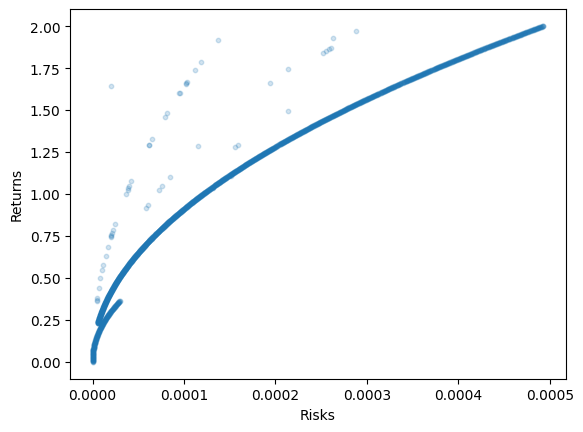

In [ ]:
plt.scatter(opt_risks, opt_returns, alpha=0.2, s=10)
plt.xlabel("Risks")
plt.ylabel("Returns")

In [ ]:
P = cov
q = None
h = np.array([-1.40])
G = -returns.reshape((1,384))
A = np.ones((1,384))
b = np.ones(1)
w = solve_qp(P, q, G, h, A, b, solver="osqp")
print("Expected Return: ", expected_return(returns, w))
print("Expected Risk: ", expected_risk(cov, w)[0][0])

Expected Return:  1.4014832356059237
Expected Risk:  0.00023976333006535237


In [ ]:
all_tickers_trained = list(cov_matrix.index)

In [ ]:
testing_data = yf.download(all_tickers_trained, start="2018-1-1", end="2018-12-31").dropna(axis=1)

[*********************100%***********************]  384 of 384 completed


In [ ]:
all_tickers_obtained = list(testing_data["Adj Close"].columns)

In [ ]:
for ticker in all_tickers_trained:
  if ticker not in all_tickers_obtained:
    print(ticker)

ABC
AET
CA


In [ ]:
indexes_to_delete = [all_tickers_trained.index("ABC"), all_tickers_trained.index("AET"), all_tickers_trained.index("CA")]

In [ ]:
adjusted_w = np.delete(w, indexes_to_delete)

In [ ]:
adjusted_w = adjusted_w / sum(adjusted_w)

In [ ]:
adjusted_w

array([ 7.47985000e-03,  2.21715026e-04,  1.65316839e-02, -1.21893513e-03,
        5.05034265e-04, -3.69575098e-03, -8.98610051e-04, -7.55339225e-03,
        2.34226198e-03,  4.62679695e-04, -2.21497625e-03, -1.82662597e-02,
       -1.57034553e-02, -3.35301692e-03,  2.42676272e-04, -2.24302556e-03,
        5.05850952e-01, -1.16457245e-03,  1.97167638e-03, -1.05867847e-02,
       -5.79766560e-03, -7.89001680e-03,  6.35481459e-03,  1.47830113e-03,
       -3.46242757e-03,  1.38296178e-03, -6.05412214e-03,  2.67906714e-03,
       -8.48464871e-04,  4.22218236e-03, -7.86947232e-03,  2.94821293e-03,
        7.16555226e-03,  5.96859660e-03, -2.14731501e-03, -1.10173920e-04,
       -4.75720403e-03,  3.09999145e-03,  3.33673024e-04,  9.76459819e-04,
        6.20661552e-02,  4.37264669e-03, -9.14123142e-04,  5.90507032e-03,
        2.36939433e-03,  2.36696075e-03,  1.11909955e-02,  5.71633726e-04,
       -1.05604215e-02, -8.56168549e-04,  5.26634437e-03, -8.54827539e-05,
       -6.03684675e-03, -

In [ ]:
testing_returns = testing_data['Adj Close'].iloc[[0, len(testing_data['Adj Close']) - 1], :].transpose()
testing_returns['returns'] = (testing_returns.iloc[:, 1] - testing_returns.iloc[:, 0]) / testing_returns.iloc[:, 0]

In [ ]:
returns = testing_returns['returns'].values


print("Our Model's Return in 2018: ", expected_return(returns, adjusted_w))
print("S&P's Return in 2018: -0.065")

Our Model's Return in 2018:  -0.06058012451362191
S&P's Return in 2018: -0.065
